# Home Assignment 1: Deep Learning from Scratch

**Authors:** Yoav Elem and Amir Solimani

## Introduction

In this assignment, we will be implementing deep learning algorithms from scratch. Before we begin, let's set up our environment by downloading the necessary packages and performing the required imports.

In [1]:
!pip install -r requirements.txt

In [2]:
from layers import ReLULayer, TanhLayer
from losses import LinearLayer, SoftmaxLayer
from neural_network import GenericNetwork
from utils import plot_loss_and_accuracy, plot_data, SGD, Gradient_test, JacobianTest

import numpy as np
import matplotlib.pyplot as plt
import scipy.io


# Set numpy print options
np.set_printoptions(precision=10, suppress=True)

# Load the datasets
swiss_roll =scipy.io.loadmat('HW1_Data(1)/SwissRollData.mat')
peaks =scipy.io.loadmat('HW1_Data(1)/PeaksData.mat')
gmm = scipy.io.loadmat('HW1_Data(1)/GMMData.mat')
sample_data = scipy.io.loadmat('HW1_Data(1)/SampleData.mat')

## 2.1.1 Softmax Layer and Gradient Test

In this section, we created the softmax loss layer. The code for the implementation of the layer and the gradient test can be found [here](losses.py).

We will now demonstrate that the layer passes the gradient test.

More specifically, we will generate a random vector $ \mathbf{d} $ where $ \|\mathbf{d}\| = 1 $. We will test the following:

- **First Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x})\| $

- **Second Order Error**: $ \|\text{softmax}(\mathbf{x} + \epsilon \mathbf{d}) - \text{softmax}(\mathbf{x}) - \epsilon \mathbf{d}^\top \nabla_\mathbf{x} \text{softmax}(\mathbf{x})\| $

The decay of epsilon is defined by the formula: $ \epsilon_t = 0.5^t $. In our plots, the x-axis represents the value of $ t $, and the y-axis shows the error measured in both first and second order errors.
note that the errors are presented in log-scale

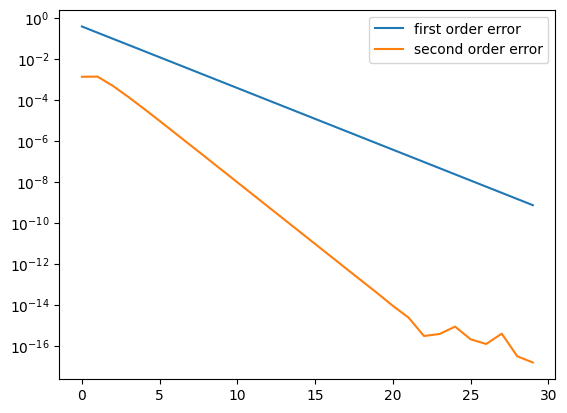

In [3]:
softmax_layer = SoftmaxLayer(4, 4)
x = np.random.rand(4, 1)
y = np.array([[0, 0, 1, 0]]).T

# Tests the gradient of the softmax layer as presented in the notes
Gradient_test(softmax_layer, x, y)

# 2.1.2 Minimizing an SGD Objective Function

## Overview
In this task, we delve into the implementation and application of Stochastic Gradient Descent (SGD) for optimizing a specific objective function. The goal is to demonstrate the effectiveness of SGD in practical scenarios.

## Task Description
We will be coding an SGD algorithm and showcasing its operational success. As recommended in our class, the approach involves creating a linear classifier that aims to approximate the identity function. This is formulated as:

$$
Wx + b = x
$$

Here, $x$ is a randomly sampled vector, and we seek to find the weights $W$ and bias $b$ such that the output mirrors the identity function. The key component of this task is the utilization of a linear layer, which is intricately linked with a loss function, thereby classifying it as a loss layer.

The SGD optimization will be performed with a learning rate $\text{lr} = 5 \times 10^{-3}$, adhering to the SGD methodology presented in class. 

For details on the implementation of the SGD function, please refer to [this link](neural_network.py). We will be using a neural network model, as outlined [here](neural_network.py). The generic SGD we created is designed to operate within a neural network context, but for this task, we will configure it as a single-layer linear neural network. This adaptation makes it perfectly suitable for our objective of approximating the identity function.


Epoch 0, training loss: 4.892287856124583
Epoch 0, training accuracy: 0.0
Epoch 0, validation loss: 4.892287856124583
Epoch 0, validation accuracy: 0.0
Epoch 1, training loss: 4.713020852990735
Epoch 1, training accuracy: 0.0
Epoch 1, validation loss: 4.713020852990735
Epoch 1, validation accuracy: 0.0
Epoch 2, training loss: 4.540322690317156
Epoch 2, training accuracy: 0.0
Epoch 2, validation loss: 4.540322690317156
Epoch 2, validation accuracy: 0.0
Epoch 3, training loss: 4.373952667560867
Epoch 3, training accuracy: 0.0
Epoch 3, validation loss: 4.373952667560867
Epoch 3, validation accuracy: 0.0
Epoch 4, training loss: 4.213678904114725
Epoch 4, training accuracy: 0.0
Epoch 4, validation loss: 4.213678904114725
Epoch 4, validation accuracy: 0.0
Epoch 5, training loss: 4.059278016120508
Epoch 5, training accuracy: 0.0
Epoch 5, validation loss: 4.059278016120508
Epoch 5, validation accuracy: 0.0
Epoch 6, training loss: 3.9105348051244415
Epoch 6, training accuracy: 0.0
Epoch 6, vali

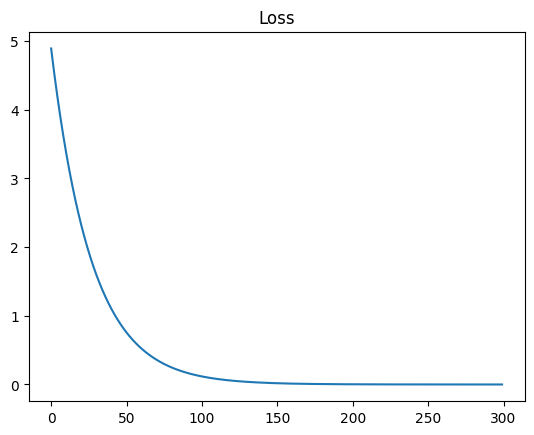

In [4]:
# define learning rate
lr = 5e-3

# generate a random input vector
x = np.random.rand(3, 1)

# define the target vector
y = x

# define the linear layer
linear_layer = GenericNetwork(LinearLayer(3, 3)) 

# Run the SGD algorithm
loss, _, _, _ = SGD(x, y, x, y, linear_layer, lr, epochs=300)

# plot the loss
plt.plot(loss)
plt.title('Loss')
plt.show()

### 2.1.3 Task Description

In this task, we are required to demonstrate the minimization of the softmax layer we created on a dataset using the SGD variant we developed. To do this, we created a sample dataset with the following characteristics:

- The datapoints are $(a, b)$ points on the plane, divided into 4 classes:
  - Class 0: if $a \ge 0$ and $b \ge 0$.
  - Class 1: if $a < 0$ and $b > 0$.
  - Class 2: if $a < 0$ and $b < 0$.
  - Class 3: if $a > 0$ and $b < 0$.

Since the softmax layer is a linear classifier, we had to ensure the dataset is linearly separable. To learn the dataset, we implemented the softmax layer. Note that we created a neural network with a single layer, which is the softmax layer, as our SGD implementation is designed to work on a network rather than an individual layer. In practice, there is no difference in computation.
We ran the experiment with 5 epochs on the dataset, each time experimenting with different mini-batch sizes and different learning rates. Below is a 3x3 table to be filled with the results:

| Learning Rate / Mini Batch Size | Size 16 | Size 64 | Size 256 |
|---------------------------------|--------|--------|---------|
| 5e-5                            |     0.75   |    0.59    |     0.61    |
| 5e-3                            |    0.998    |     0.997   |     0.991    |
| 5e-1                            |      0.989  |    0.991    |       0.996  |

The table shows the different accuracies measured at the end of the experiment on the validation set. As observed, the batch size did not have a significant impact. The learning rate of 5e-5 performed poorly, but this is attributed to the limited training duration of only 5 epochs, requiring more time to converge due to its small magnitude. The best result was obtained with a learning rate of 5e-3 and a mini-batch size of 16.


Epoch 0, training loss: 0.23757727741488888
Epoch 0, training accuracy: 0.99815
Epoch 0, validation loss: 0.23768837176622215
Epoch 0, validation accuracy: 0.9986
Epoch 1, training loss: 0.18592731850760164
Epoch 1, training accuracy: 0.9972
Epoch 1, validation loss: 0.18596442398101937
Epoch 1, validation accuracy: 0.997
Epoch 2, training loss: 0.16128514582691805
Epoch 2, training accuracy: 0.99765
Epoch 2, validation loss: 0.1617101366363845
Epoch 2, validation accuracy: 0.9988
Epoch 3, training loss: 0.14602466080514145
Epoch 3, training accuracy: 0.99725
Epoch 3, validation loss: 0.1465203092586811
Epoch 3, validation accuracy: 0.9988
Epoch 4, training loss: 0.13528308140309112
Epoch 4, training accuracy: 0.99755
Epoch 4, validation loss: 0.135731525277331
Epoch 4, validation accuracy: 0.9986


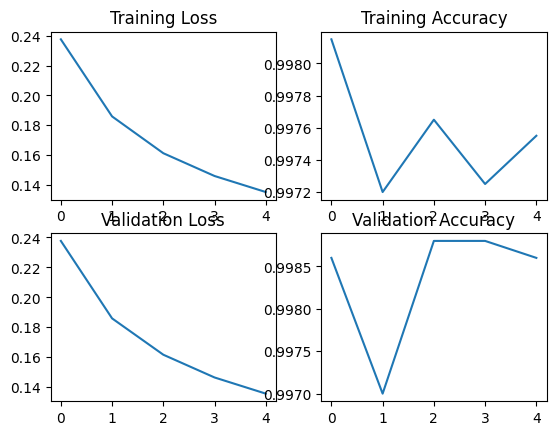

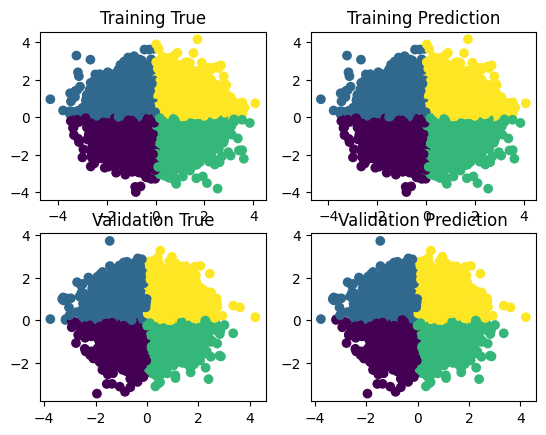

In [5]:
lr = 5e-3
batch_size = 16
dataset = sample_data

Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']

# define the network
network = GenericNetwork(SoftmaxLayer(2, 4))

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=5)

# plot the loss and accuracy
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)
plot_data(network, Xt, Yt, Xv, Yv)


### Task 2.2.1

In this task, we are required to implement the neural network with the forward and backward pass. The code for the `GenericNetwork` class can be found [here](neural_network.py).

Below we plotted the results of the Jacobian test on the `tanh` layer we created. The implementation of which can be found [here](layers.py).


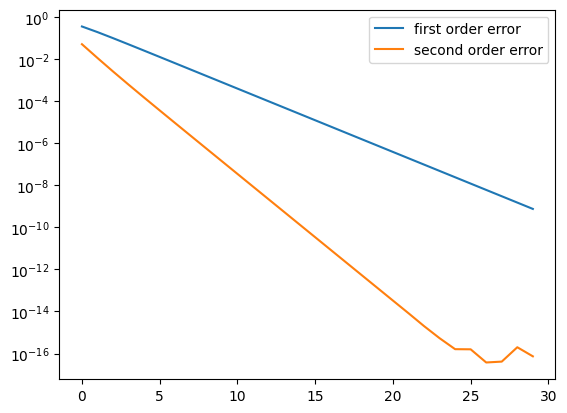

In [6]:
tanh_layer = TanhLayer(2, 2)
x = np.random.rand(2, 1)
JacobianTest(tanh_layer, x)

2.1.4

Epoch 0, training loss: 2.155400554497271
Epoch 0, training accuracy: 0.5222
Epoch 0, validation loss: 2.162707411179311
Epoch 0, validation accuracy: 0.5202
Epoch 1, training loss: 1.873383411862528
Epoch 1, training accuracy: 0.54055
Epoch 1, validation loss: 1.889819815804255
Epoch 1, validation accuracy: 0.5348
Epoch 2, training loss: 1.663120240062494
Epoch 2, training accuracy: 0.55165
Epoch 2, validation loss: 1.6799894246569718
Epoch 2, validation accuracy: 0.5494
Epoch 3, training loss: 1.4901463519128817
Epoch 3, training accuracy: 0.5609
Epoch 3, validation loss: 1.5064257681590905
Epoch 3, validation accuracy: 0.56
Epoch 4, training loss: 1.3473725134255161
Epoch 4, training accuracy: 0.57
Epoch 4, validation loss: 1.3616452676282147
Epoch 4, validation accuracy: 0.567
Epoch 5, training loss: 1.2278310823716532
Epoch 5, training accuracy: 0.5854
Epoch 5, validation loss: 1.2398230806354296
Epoch 5, validation accuracy: 0.581
Epoch 6, training loss: 1.1300264779765858
Epoch 

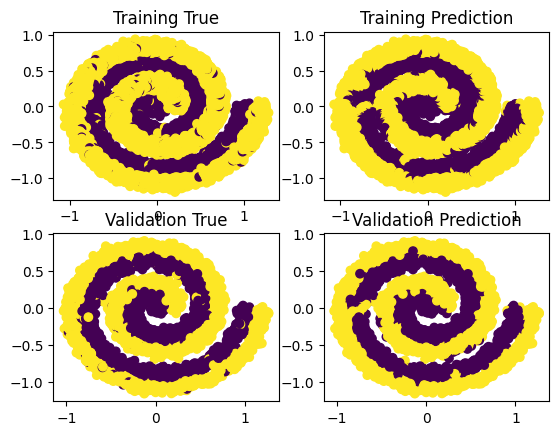

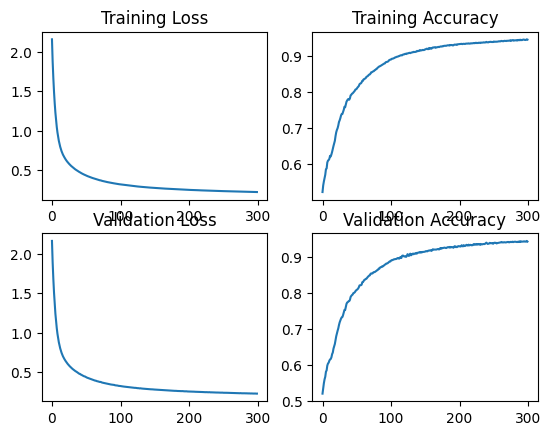

In [7]:
dataset = swiss_roll
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 2),
layers = [
    TanhLayer(2, 128),
    TanhLayer(128, 128)
],
)

# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)


In [8]:
dataset = peaks
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(2, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)
plot_data(network, Xt, Yt, Xv, Yv)
plot_loss_and_accuracy(tloss, tacc, vloss, vacc)

Epoch 0, training loss: 2.9394552709908677
Epoch 0, training accuracy: 0.70752
Epoch 0, validation loss: 3.2251675640121578
Epoch 0, validation accuracy: 0.70672
Epoch 1, training loss: 2.353309193266487
Epoch 1, training accuracy: 0.72952
Epoch 1, validation loss: 2.623326919507381
Epoch 1, validation accuracy: 0.72432
Epoch 2, training loss: 2.0695663628783163
Epoch 2, training accuracy: 0.75516
Epoch 2, validation loss: 2.3435633047472746
Epoch 2, validation accuracy: 0.74992
Epoch 3, training loss: 1.8632928573204388
Epoch 3, training accuracy: 0.76728
Epoch 3, validation loss: 2.0725969494344816
Epoch 3, validation accuracy: 0.76496
Epoch 4, training loss: 1.6632280944674052
Epoch 4, training accuracy: 0.7994
Epoch 4, validation loss: 1.8705305619112325
Epoch 4, validation accuracy: 0.79312
Epoch 5, training loss: 1.4976494814143118
Epoch 5, training accuracy: 0.80052
Epoch 5, validation loss: 1.674976033036512
Epoch 5, validation accuracy: 0.79536
Epoch 6, training loss: 1.267458

In [ ]:
dataset = gmm
Xt = dataset['Yt']
Yt = dataset['Ct']
Xv = dataset['Yv']
Yv = dataset['Cv']
lr = 5e-5

network = GenericNetwork(
SoftmaxLayer(128, 5),
layers = [
    ReLULayer(5, 128),
    ReLULayer(128, 128)
],
)


# train the network
tloss, vloss, tacc, vacc = SGD(Xt, Yt, Xv, Yv, network, lr, epochs=300)

Epoch 0, training loss: 4.602336027434295
Epoch 0, training accuracy: 0.68192
Epoch 0, validation loss: 4.5929696526964
Epoch 0, validation accuracy: 0.68352
Epoch 1, training loss: 2.718461484977958
Epoch 1, training accuracy: 0.78004
Epoch 1, validation loss: 2.7329841425028847
Epoch 1, validation accuracy: 0.78128
Epoch 2, training loss: 2.107779507523247
Epoch 2, training accuracy: 0.83508
Epoch 2, validation loss: 2.1230535831796793
Epoch 2, validation accuracy: 0.8296
Epoch 3, training loss: 1.823805906475121
Epoch 3, training accuracy: 0.85936
Epoch 3, validation loss: 1.8428854386051339
Epoch 3, validation accuracy: 0.85472
Epoch 4, training loss: 1.6573380412828034
Epoch 4, training accuracy: 0.8736
Epoch 4, validation loss: 1.6720790396451117
Epoch 4, validation accuracy: 0.87568
Epoch 5, training loss: 1.5703017778343635
Epoch 5, training accuracy: 0.87932
Epoch 5, validation loss: 1.5651014682622435
Epoch 5, validation accuracy: 0.87888
Epoch 6, training loss: 1.43717476979